<a href="https://colab.research.google.com/github/Parinitha-M-Samaga/DL/blob/main/RNN_LSTM_GRU_Reddit_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pd.options.plotting.backend='plotly'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv("/content/Reddit_Data.csv")
print(df.head())
print(df.shape)

                                          clean_text  category
0  family mormon have never tried explain them th...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1
(37249, 2)


In [ ]:
df.isnull().sum()

clean_text    218
category        0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(37031, 2)

In [ ]:
df['category']=df['category'].map({-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'})
df.head()

,clean_text,category
0,family mormon have never tried explain them th...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive


In [ ]:
df.groupby('category').count().plot(kind='bar')

In [ ]:
comm_len=pd.Series([len(tweet.split()) for tweet in df['clean_text']])
comm_len.plot(kind='box')

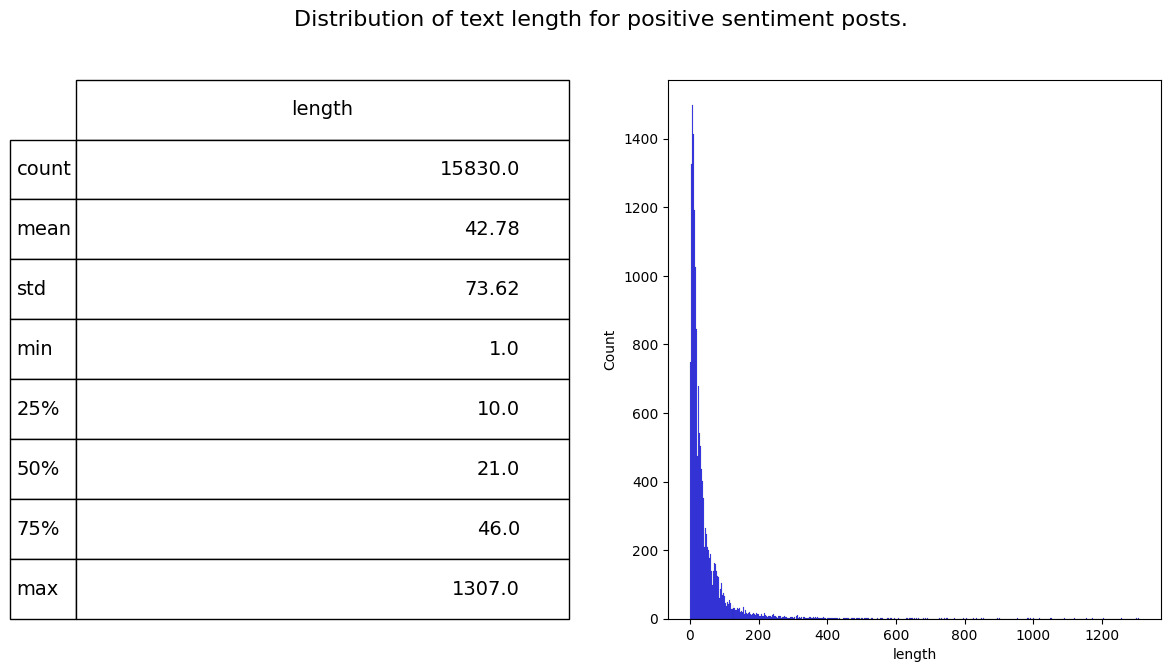

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='blue')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment posts.', fontsize=16)

plt.show()

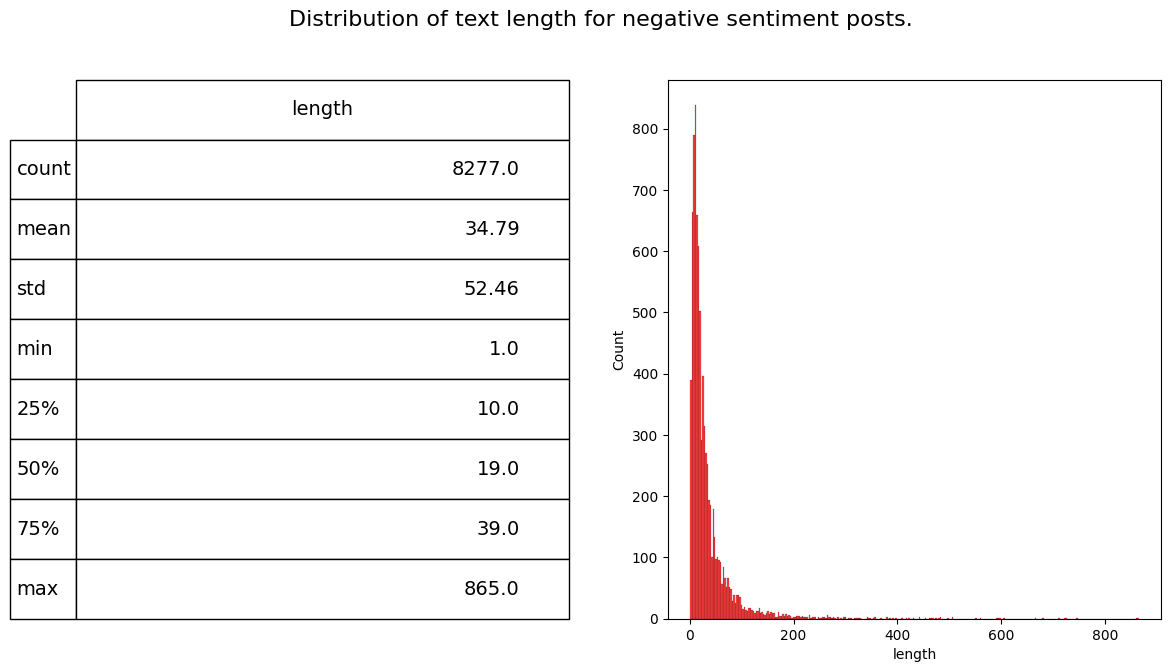

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment posts.', fontsize=16)

plt.show()

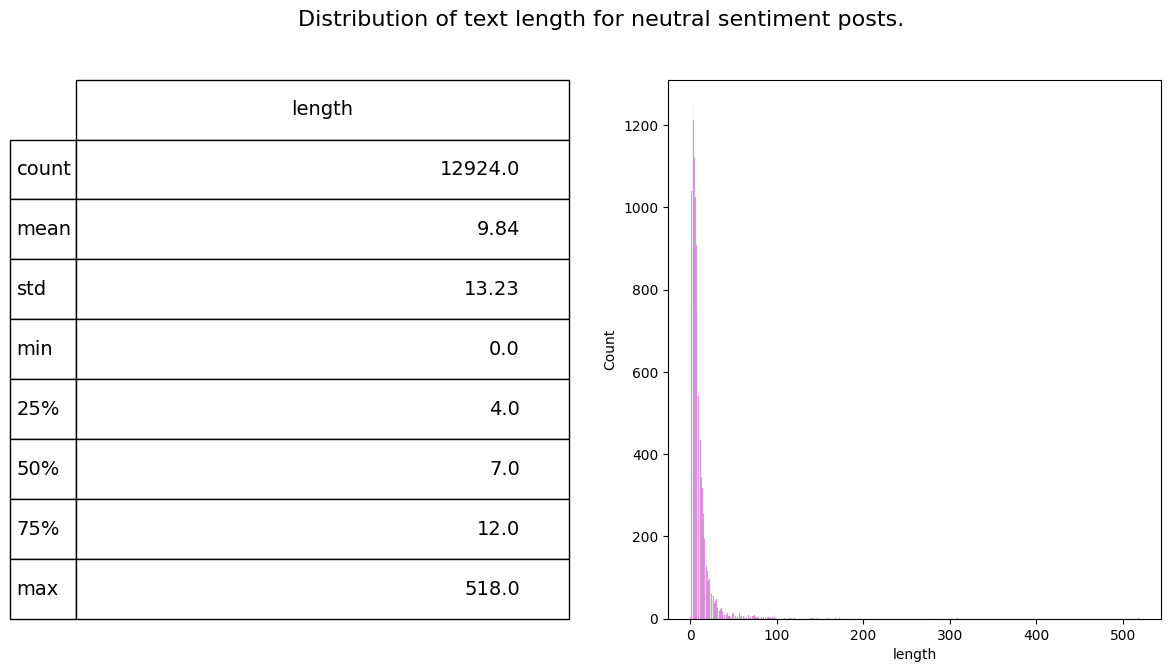

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Neutral']['length'], ax=ax1,color='violet')
describe = df.length[df.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment posts.', fontsize=16)

plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category',color='category', title ='Pie chart of different sentiments of posts', color_discrete_map = {
    'Positive': 'blue',
    'Negative': 'red',
    'Neutral': 'violet'
})
fig.show()

In [ ]:
df.drop(['length'], axis=1, inplace=True)
df.head()

,clean_text,category
0,family mormon have never tried explain them th...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

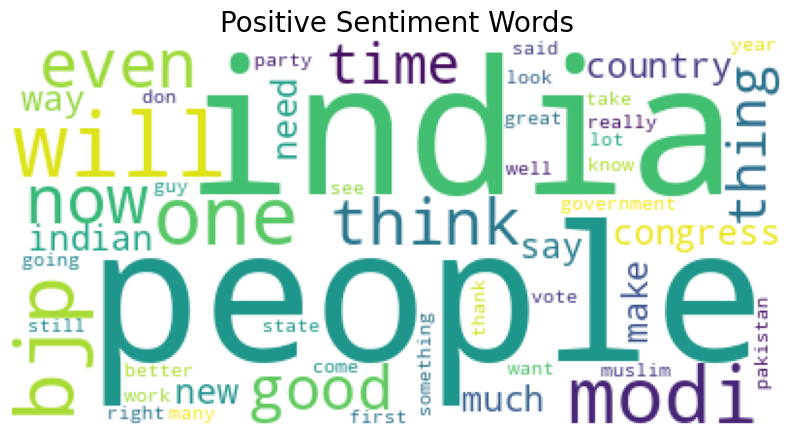

In [ ]:
wordcount_gen(df, 'Positive')

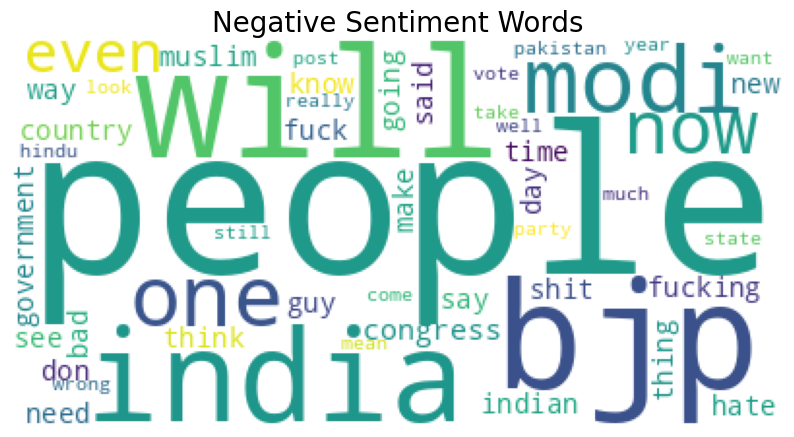

In [ ]:
wordcount_gen(df, 'Negative')

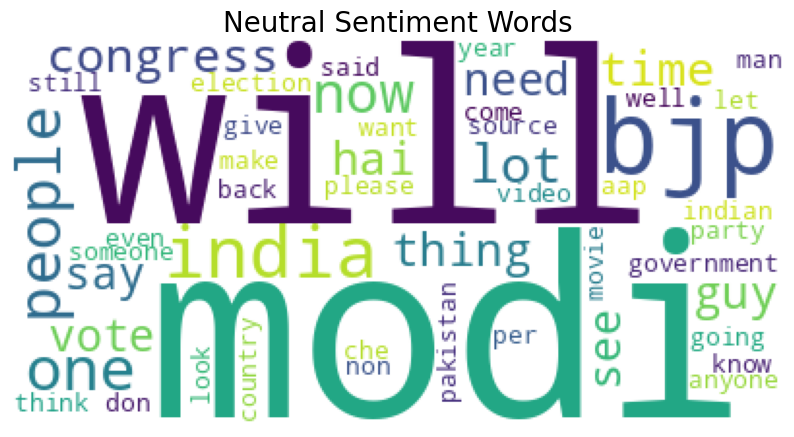

In [ ]:
wordcount_gen(df, 'Neutral')

In [ ]:
def posts_to_words(post):
    text = post.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

print("\nOriginal post: ", df['clean_text'][0])
print("\nProcessed post: ", posts_to_words(df['clean_text'][0]))


Original post:  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches

Processed post:  ['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']


In [ ]:
data = list(map(posts_to_words, df['clean_text']))
data[0]

['famili',
 'mormon',
 'never',
 'tri',
 'explain',
 'still',
 'stare',
 'puzzl',
 'time',
 'time',
 'like',
 'kind',
 'strang',
 'creatur',
 'nonetheless',
 'come',
 'admir',
 'patienc',
 'calm',
 'equanim',
 'accept',
 'compass',
 'develop',
 'thing',
 'buddhism',
 'teach']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
res = le.fit_transform(df['category'])

In [ ]:
print(df['clean_text'][0])
print(data[0])
print(df['category'][0])
print(res[0])

family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches
['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']
Positive
2


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    data = tokenizer.texts_to_sequences(text)
    data = pad_sequences(data, padding='post', maxlen=max_len)
    return data, tokenizer

print('Before Tokenization & Padding: \n', df['clean_text'][0])
data, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding: \n', data[0])

Before Tokenization & Padding: 
 family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches
After Tokenization & Padding: 
 [ 254   10  122  641  870   39    9   94   23   53   53   21   42  289
 4163    9   10  128 3148    5    1    2 4415   10 1438   18    1  111
 1517    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
res = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(type(X_train),type(y_train))
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
Train Set:  (22218, 50) (22218, 3)
Validation Set:  (7406, 50) (7406, 3)
Test Set:  (7407, 50) (7407, 3)


**Simple RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, SimpleRNN, LeakyReLU
from keras import losses

vocab_size=5000
embedding_size=64
epochs=10
learning_rate=0.1

model = Sequential()
model.add(Embedding(vocab_size,embedding_size,input_length = max_len))
model.add(SimpleRNN(10 ,input_shape = (vocab_size,max_len), return_sequences=False))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3, activation='softmax'))

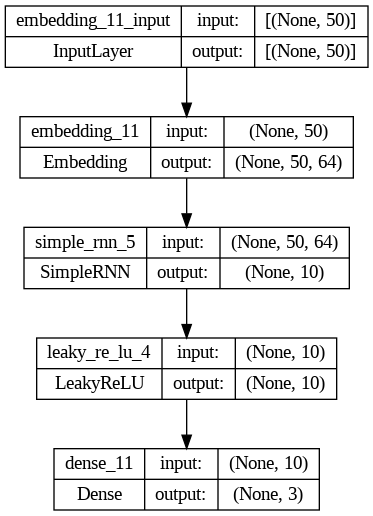

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 50, 64)            320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 10)                750       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 320783 (1.22 MB)
Trainable params: 320783 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
348/348 [==============================] - 10s 24ms/step - loss: 1.0592 - accuracy: 0.4217 - val_loss: 1.0898 - val_accuracy: 0.4311


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[1.0748306512832642, 0.42702847719192505]


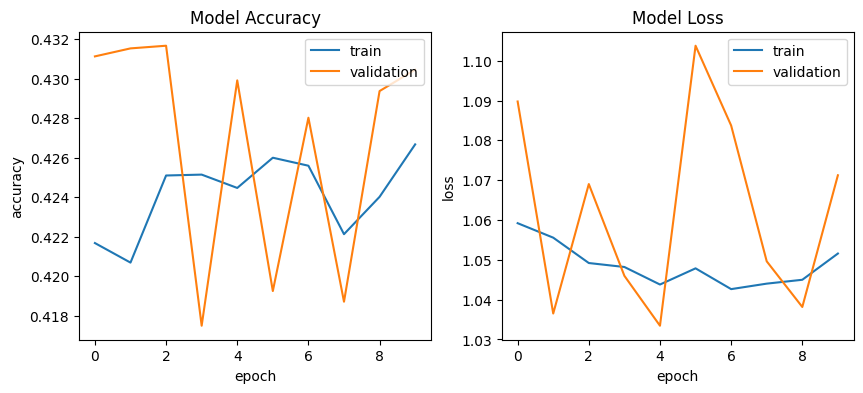

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

**LSTM**

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=10
learning_rate = 0.1

model = Sequential()
model.add(Embedding(vocab_size,embedding_size,input_length = max_len))
model.add(LSTM(10))
model.add(Dense(3, activation='softmax'))

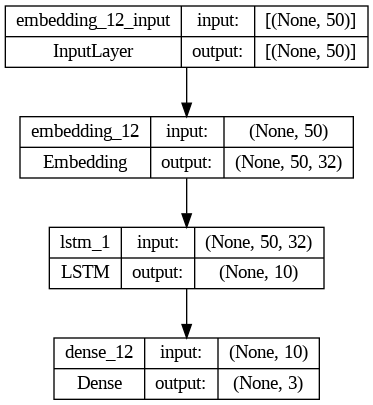

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 32)            160000    
                                                                 
 lstm_1 (LSTM)               (None, 10)                1720      
                                                                 
 dense_12 (Dense)            (None, 3)                 33        
                                                                 
Total params: 161753 (631.85 KB)
Trainable params: 161753 (631.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
348/348 [==============================] - 13s 32ms/step - loss: 0.9874 - accuracy: 0.5238 - val_loss: 0.9488 - val_accuracy: 0.5747
Epoch 2/10
348/348 [==============================] - 10s 30ms/step - loss: 0.9462 - accuracy: 0.5528 - val_loss: 0.9753 - val_a

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[1.0236543416976929, 0.47455111145973206]


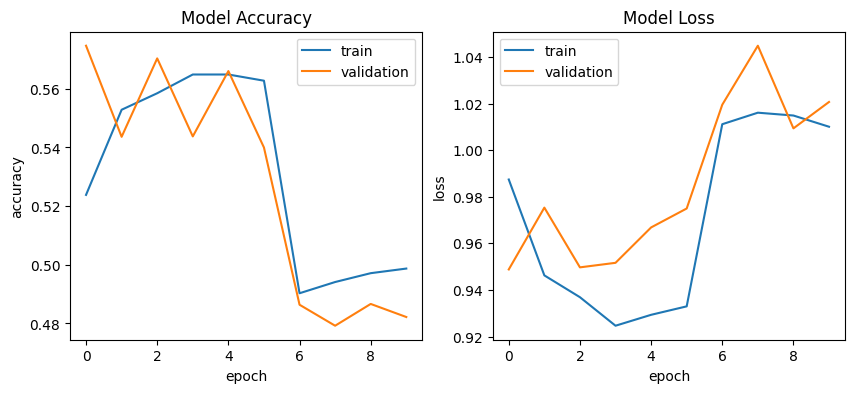

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

**GRU**

In [ ]:
from keras.layers import GRU

vocab_size = 5000
embedding_size = 32
epochs=10
learning_rate = 0.1

model = Sequential()
model.add(Embedding(vocab_size,embedding_size,input_length =max_len))
model.add(GRU(8))
model.add(Dense(3, activation='softmax'))

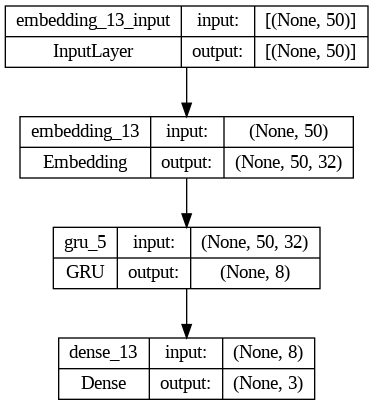

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 32)            160000    
                                                                 
 gru_5 (GRU)                 (None, 8)                 1008      
                                                                 
 dense_13 (Dense)            (None, 3)                 27        
                                                                 
Total params: 161035 (629.04 KB)
Trainable params: 161035 (629.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
348/348 [==============================] - 14s 34ms/step - loss: 0.7442 - accuracy: 0.6905 - val_loss: 0.6397 - val_accuracy: 0.7213
Epoch 2/10
348/348 [==============================] - 11s 31ms/step - loss: 0.5904 - accuracy: 0.7903 - val_loss: 0.5828 - val_a

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.6426886320114136, 0.7690023183822632]


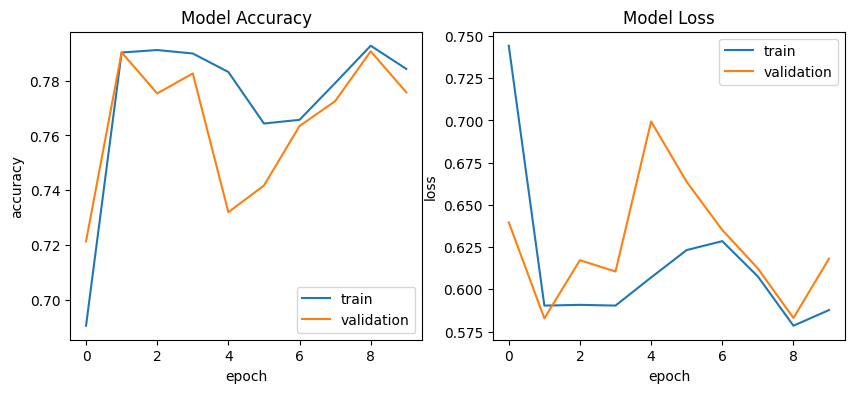

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)